In [16]:
import pandas as pd
import geopandas as gpd

In [45]:
wiliam = pd.read_csv('WILIAM_regions.csv')
wiliam['Regions'] = wiliam['Regions'].str.strip()
wiliam

,Regions,WILIAM
0,Austria,AUSTRIA
1,Belgium,BELGIUM
2,Bulgaria,BULGARIA
3,Croatia,CROATIA
4,Cyprus,CYPRUS
5,Czechia,CZECHIA
6,Denmark,DENMARK
7,Estonia,ESTONIA
8,Finland,FINLAND
9,France,FRANCE


In [55]:
fund = pd.read_csv('FUND_regions.csv')
fund

,Code,Name,Countries
0,USA,USA,United States of America
1,CAN,Canada,Canada
2,WEU,Western Europe,"Andorra, Austria, Belgium, Cyprus, Denmark, Fi..."
3,JPK,Japan and South Korea,"Japan, South Korea"
4,ANZ,Australia and New Zealand,"Australia, New Zealand"
5,CEE,Central and Eastern Europe,"Albania, Bosnia and Herzegovina, Bulgaria, Cro..."
6,FSU,Former Soviet Union,"Armenia, Azerbaijan, Belarus, Estonia, Georgia..."
7,MDE,Middle East,"Bahrain, Iran, Iraq, Israel, Jordan, Kuwait, L..."
8,CAM,Central America,"Belize, Costa Rica, El Salvador, Guatemala, Ho..."
9,SAM,South America,"Argentina, Bolivia, Brazil, Chile, Colombia, E..."


In [56]:
fund['Countries'] = fund['Countries'].str.split(',')
fund_exploded = fund.explode('Countries')
fund_exploded['Countries'] = fund_exploded['Countries'].str.strip()
fund_exploded

,Code,Name,Countries
0,USA,USA,United States of America
1,CAN,Canada,Canada
2,WEU,Western Europe,Andorra
2,WEU,Western Europe,Austria
2,WEU,Western Europe,Belgium
...,...,...,...
15,SIS,Small Island States,Tonga
15,SIS,Small Island States,Trinidad and Tobago
15,SIS,Small Island States,Tuvalu
15,SIS,Small Island States,Vanuatu


In [61]:
correspondance = wiliam.merge(fund_exploded, left_on='Regions', right_on='Countries', how='left')
correspondance = correspondance.rename(columns={'Code': 'FUND'})
correspondance.to_csv('correspondance.csv', index=False)

In [62]:
correspondance

,Regions,WILIAM,FUND,Name,Countries
0,Austria,AUSTRIA,WEU,Western Europe,Austria
1,Belgium,BELGIUM,WEU,Western Europe,Belgium
2,Bulgaria,BULGARIA,CEE,Central and Eastern Europe,Bulgaria
3,Croatia,CROATIA,CEE,Central and Eastern Europe,Croatia
4,Cyprus,CYPRUS,WEU,Western Europe,Cyprus
5,Czechia,CZECHIA,NaN,NaN,NaN
6,Denmark,DENMARK,WEU,Western Europe,Denmark
7,Estonia,ESTONIA,FSU,Former Soviet Union,Estonia
8,Finland,FINLAND,WEU,Western Europe,Finland
9,France,FRANCE,WEU,Western Europe,France


In [69]:
correspondance.loc['UK', 'FUND'] = 'WEU'
correspondance

,Regions,WILIAM,FUND,Name,Countries,Code
0,Austria,AUSTRIA,WEU,Western Europe,Austria,NaN
1,Belgium,BELGIUM,WEU,Western Europe,Belgium,NaN
2,Bulgaria,BULGARIA,CEE,Central and Eastern Europe,Bulgaria,NaN
3,Croatia,CROATIA,CEE,Central and Eastern Europe,Croatia,NaN
4,Cyprus,CYPRUS,WEU,Western Europe,Cyprus,NaN
5,Czechia,CZECHIA,NaN,NaN,NaN,NaN
6,Denmark,DENMARK,WEU,Western Europe,Denmark,NaN
7,Estonia,ESTONIA,FSU,Former Soviet Union,Estonia,NaN
8,Finland,FINLAND,WEU,Western Europe,Finland,NaN
9,France,FRANCE,WEU,Western Europe,France,NaN


<Axes: >

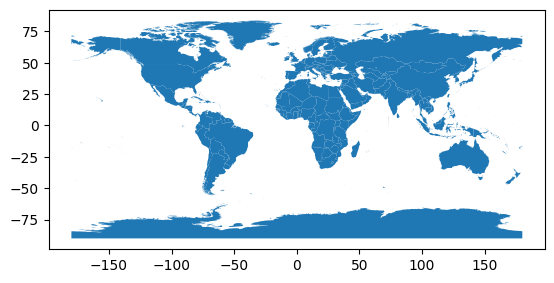

In [22]:
countries = gpd.read_file(r'naturalearthdata\ne_10m_admin_0_countries.shp')
countries.plot()

In [23]:
countries

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Admin-0 country,0,4,China,CH1,1,2,Country,1,Macao S.A.R,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
254,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,1,Ashmore and Cartier Islands,...,None,None,None,None,None,None,None,None,None,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
255,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,1,Bajo Nuevo Bank (Petrel Is.),...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
256,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,1,Serranilla Bank,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


In [30]:
fund_spatial = countries.merge(fund_exploded, left_on='ADMIN', right_on='Countries')
fund_spatial

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,Code,Name,Countries
0,Admin-0 country,0,2,Argentina,ARG,0,2,Sovereign country,1,Argentina,...,None,None,None,None,None,None,"MULTIPOLYGON (((-67.19390 -22.82222, -67.14269...",SAM,South America,Argentina
1,Admin-0 country,0,2,China,CH1,1,2,Country,1,China,...,None,None,None,None,None,None,"MULTIPOLYGON (((78.91769 33.38626, 78.91595 33...",CHI,China plus,China
2,Admin-0 country,0,6,Albania,ALB,0,2,Sovereign country,1,Albania,...,None,None,None,None,None,None,"POLYGON ((20.56715 41.87318, 20.54172 41.86158...",CEE,Central and Eastern Europe,Albania
3,Admin-0 country,0,6,Armenia,ARM,0,2,Sovereign country,1,Armenia,...,None,None,None,None,None,None,"MULTIPOLYGON (((45.00240 41.29045, 45.03940 41...",FSU,Former Soviet Union,Armenia
4,Admin-0 country,0,3,Angola,AGO,0,2,Sovereign country,1,Angola,...,None,None,None,None,None,None,"MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4...",SSA,Sub-Saharan Africa,Angola
5,Admin-0 country,0,6,Brunei,BRN,0,2,Sovereign country,1,Brunei,...,None,None,None,None,None,None,"MULTIPOLYGON (((115.14617 4.90851, 115.14680 4...",SEA,Southeast Asia,Brunei
6,Admin-0 country,0,3,Algeria,DZA,0,2,Sovereign country,1,Algeria,...,None,None,None,None,None,None,"POLYGON ((-4.82161 24.99506, -4.99519 25.10209...",NAF,North Africa,Algeria
7,Admin-0 country,0,6,Andorra,AND,0,2,Sovereign country,1,Andorra,...,None,None,None,None,None,None,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ...",WEU,Western Europe,Andorra
8,Admin-0 country,0,3,Afghanistan,AFG,0,2,Sovereign country,1,Afghanistan,...,None,None,None,None,None,None,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",SAS,South Asia,Afghanistan
9,Admin-0 country,0,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,"MULTIPOLYGON (((-122.75302 48.99251, -122.6532...",USA,USA,United States of America
